# **Introdução ao conjunto de dados**

Para o nosso estudo, vamos usar um base de dados com informações sobre o sistema cardiovascular e ataques cardíacos. Os dados já foram previamente tratados pelo autor, portanto podemos direcionar nosso foco à visualização.<br>
Esses dados estão disponíveis no [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).

**Dicionário de dados**
- Age: idade do paciente

- Sex: sexo do paciente [M: Homem, F: Mulher]

- ChestPainType: tipo de dor peitoral [TA: angina típica, ATA: angina atípica, NAP: dor não anginal, ASY: assintomático]

- RestingBP: pressão sanguínea em repouso [mmHg]

- Cholesterol: colesterol [mm/dl]

- FastingBS: açúcar no sangue em jejum [1: se FastingBS > 120 mg/dl, 0: se não]

- RestingECG: resultado do eletrocardiograma sob repouso [Normal: Normal, ST: anormalidade de onda ST-T, LVH: apresenta hipertrofia ventricular esquerda provável ou definitiva, conforme critério de Estes]

- MaxHR: frequência cardíaca máxima atingida [entre 60 e 202]

- ExerciseAngina: angina induzida por exercício [Y: Sim, N: Não]

- Oldpeak: oldpeak = ST

- ST_Slope: a inclinação do pico do segmento ST do exercício [Up: ascendente, Flat: plano, Down: descendente]

- HeartDisease: resultado [1: doença cardíaca, 0: normal]



In [ ]:
import pandas as pd

df = pd.read_csv('Dados/heart.csv', sep=',')
display(df.head())
display(df.info())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None

In [ ]:
for coluna in df.columns:
  print(coluna)

Age
Sex
ChestPainType
RestingBP
Cholesterol
FastingBS
RestingECG
MaxHR
ExerciseAngina
Oldpeak
ST_Slope
HeartDisease


In [ ]:
# Tradução do nome das features

colunas_pt = {
    'Age': 'idade',
    'Sex': 'sexo',
    'ChestPainType': 'tipo_dor_peitoral',
    'RestingBP': 'pressao_repouso',
    'Cholesterol': 'colesterol',
    'FastingBS': 'acucar_jejum',
    'RestingECG': 'ecg_repouso',
    'MaxHR': 'freq_cardiaca_max',
    'ExerciseAngina': 'angina_exercicio',
    'Oldpeak': 'old_peak',
    'ST_Slope': 'inclinacao_st',
    'HeartDisease': 'doenca_cardiaca'
}

df = df.rename(columns=colunas_pt)

Nosso dataframe possui 918 registros e 12 features. Possui 6 colunas do tipo inteiro, 1 float e 5 com strings.<br>
Como dito, já passou por um prévio tratamento antes da disponibilização, e não há necessidade de tratamento de inconsistências, tipagem de dados ou missing values.

# **Visualizando correlações**

Correlação é uma medida estatística que mede a relação entre fenômenos. Mais comumente utilizada para a medição, o coeficiente de correlação de Pearson varia de -1 a 1, sendo os extremos correlação perfeitas inversamente ou diretamente proporcionais, respectivamente. 0 representa fenômenos sem correlação.

> Importante destacar que **correlação não implica causalidade.**

Dois fenômenos que possuem forte correlações podem não ter qualquer relação de causa e efeito, como pode ser observado no site [Spurious Correlations](https://www.tylervigen.com/spurious-correlations).
<br>

Avaliar correlações entre features pode nos ajudar a responder muitos problemas e é uma etapa muito presente em análises exploratórias. Não somente isso, existem modelos de aprendizado de máquina para aprendizado de correlações, como os modelos de regressão.

## **Gráfico de dispersão**

In [ ]:
df.head()

,idade,sexo,tipo_dor_peitoral,pressao_repouso,colesterol,acucar_jejum,ecg_repouso,freq_cardiaca_max,angina_exercicio,old_peak,inclinacao_st,doenca_cardiaca
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


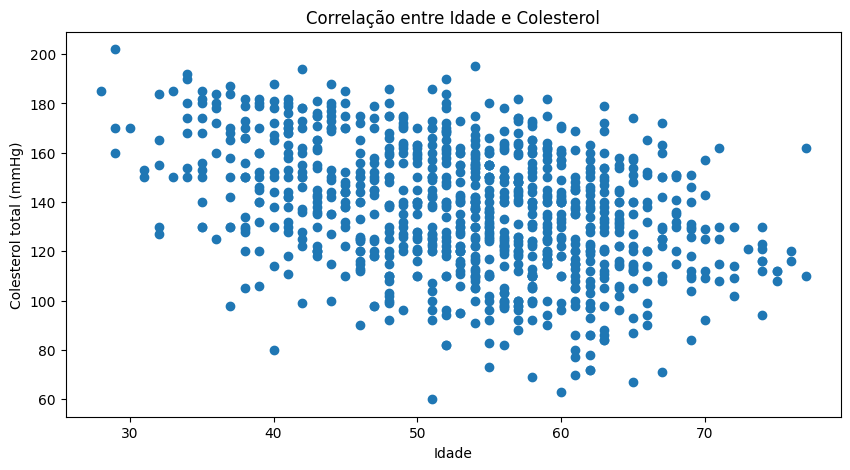

In [ ]:
import matplotlib.pyplot as plt

# Criando os objetos Figure e Axes
fig, ax = plt.subplots(
    figsize=(10,5) # Define o tamanho da Figure (largura, altura)
)

ax.scatter(x=df.idade, y=df.freq_cardiaca_max)
ax.set_title('Correlação entre Idade e Colesterol')
ax.set_xlabel('Idade')
ax.set_ylabel('Colesterol total (mmHg)')

plt.show()